# Ước tính ngân sách hoa hồng bằng phương pháp Monte Carlo

## Monte Carlo Simulation:
Mô phỏng Monte Carlo là gì?
Mô phỏng Monte Carlo là một kỹ thuật toán học dự đoán kết quả có thể xảy ra của một sự kiện không chắc chắn. Các chương trình máy tính sử dụng phương pháp này để phân tích dữ liệu trong quá khứ và dự đoán một loạt các kết quả trong tương lai dựa trên một lựa chọn hành động. Ví dụ: nếu bạn muốn ước tính doanh số bán hàng trong tháng đầu tiên của một sản phẩm mới, bạn có thể cung cấp cho chương trình mô phỏng Monte Carlo dữ liệu bán hàng lịch sử của bạn. Chương trình sẽ ước tính các giá trị bán hàng khác nhau dựa trên các yếu tố như điều kiện thị trường chung, giá sản phẩm và ngân sách quảng cáo.
Trích: https://aws.amazon.com/vi/what-is/monte-carlo-simulation/

## Bài toán:
Như vậy hiểu một cách đơn giản, Monte Carlo là một phương pháp ước lượng, dựa trên thông tin đầu vão ngẫu nhiên nhằm tìm ra (ước lượng) phân phối của của đầu ra (mà các phương pháp toán tính toán thông thường không thể tính được). Nói tóm lại, với một số bài toán phức tạp, ta không tính được kết quả chính xác, thì ta ước lượng kết quả trong một khoảng giá trị có xác suất xảy ra cao nhất, bằng cách cho một hoặc nhiều biến đầu vào nhận các giá trị ngẫu nhiên. Để rõ hơn vấn đề, ta sẽ giải bài toán cụ thể bên dưới.

Công ty muốn đưa ra chính sách hoa hồng cơ bản mới cho đại lý với tỷ lệ dựa trên mức độ hoàn thành chỉ tiêu như sau:  
    - 0-90% = 2%  
    - 91-99% = 3%  
    - >= 100 = 4%  

Biết rằng công ty có 1000 đại lí với level và tỷ lệ như sau FTD (5%), FTM (20%), FTA (75%) với mức cam kết lần lượt là 300tr, 100tr, 50tr.

## Thực hiện:

- Thống kê cho thấy, trung bình, mỗi đại lý có tỷ lệ hoàn thành KPI đạt 88% với phương sai là 20%. Với giả định tỷ lệ hoàn thành chỉ tiêu có phân phối chuẩn.  
    + Ta có biến đầu vào X là tỷ lệ hoàn thành KPI.  
    + Ta sẽ chạy mô phỏng trên 10.000 lần


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Xác định các hằng số:

In [2]:
avg = 0.88
std_dev = .2
num_agt = 1000
num_simulations = 10000
# Show an example of calculating the percent to target
kpi_achievement = np.random.normal(avg, std_dev, num_agt).round(2)

### Tạo giá trị ngẫu nhiên cho biến đầu vào:
Như đã trình bày ở trên, tỷ lệ hoàn thành của 1 người là biến ngẫu nhiên theo phân phối chuẩn có u=.88 và std=.2.  
Với mỗi lần mô phỏng:  
    - Ta gán ngẫu nhiên tỷ lệ hoàn thành cho từng người trong 1000 agent và thực hiện tính commission.  
    - Từ đó, cùng với kpi mà cá nhân cam kết, tính được số actual sale và sau đó tính được tỷ lệ commision

Công thức tính tỷ lệ hoa hồng:

In [4]:
def get_commission_rate(x):
    if x <= .90:
        return .02
    if x <= .99:
        return .03
    else:
        return .04

In [5]:
data = pd.DataFrame(data= {'personal_target':personal_target,'achievement':kpi_achievement})
data['actual_sales'] = data['personal_target']*data['achievement']
data['commission_rate'] =data['achievement'].map(get_commission_rate)
data['commission_amt'] = data['commission_rate'] * data['actual_sales']

In [6]:
data[['achievement']].describe()

,achievement
count,1000.00000
mean,0.87536
std,0.20555
min,0.19000
25%,0.74000
50%,0.88000
75%,1.02000
max,1.53000


In [7]:
data.head()

,personal_target,achievement,actual_sales,commission_rate,commission_amt
0,50000000,0.51,25500000.0,0.02,510000.0
1,50000000,1.05,52500000.0,0.04,2100000.0
2,50000000,1.14,57000000.0,0.04,2280000.0
3,50000000,0.75,37500000.0,0.02,750000.0
4,50000000,1.06,53000000.0,0.04,2120000.0


### Kết quả 1 lần mô phỏng:
- Ta thấy rằng, với 1 lần mô phỏng, ta nhận được kết quả số tiền hoa hồng cần chi trả là: 1.8 tỷ đồng cho doanh thu 63.8 tỷ (khoảng ~3%).
- Phần lớn đại lý nhận được hoa hồng trong khoảng 1.8tr/người.

In [8]:
data.sum()

personal_target    7.295000e+10
achievement        8.753600e+02
actual_sales       6.385250e+10
commission_rate    2.758000e+01
commission_amt     1.864635e+09
dtype: float64

<Axes: xlabel='commission_amt', ylabel='Count'>

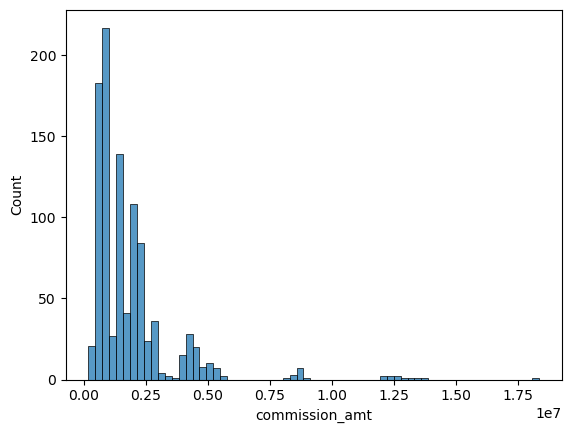

In [9]:
sns.histplot(data=data, x='commission_amt')

In [10]:
data.describe()

,personal_target,achievement,actual_sales,commission_rate,commission_amt
count,1.000000e+03,1000.00000,1.000000e+03,1000.000000,1.000000e+03
mean,7.295000e+07,0.87536,6.385250e+07,0.027580,1.864635e+06
std,5.678047e+07,0.20555,5.261105e+07,0.008844,1.828467e+06
min,5.000000e+07,0.19000,9.500000e+06,0.020000,1.900000e+05
25%,5.000000e+07,0.74000,3.900000e+07,0.020000,7.800000e+05
50%,5.000000e+07,0.88000,4.825000e+07,0.020000,1.410000e+06
75%,1.000000e+08,1.02000,6.100000e+07,0.040000,2.180000e+06
max,3.000000e+08,1.53000,4.590000e+08,0.040000,1.836000e+07


### Mô phỏng 10.000 lần:
- Lưu ý rằng kết quả ở trên chỉ là 1 lần mô phỏng với tỷ lệ hoàn thành ngẫu nhiên.
- Trên thực tế, có thế có rất nhiều kịch bản xảy ra, do đó ta sẽ mô phỏng như cách ở trên với 10000 kịch bản khác nhau và quan sát giá trị commission thay đổi qua các lần mô phỏng từ đó rút ra được dự đoán kết quả cuối cùng.

In [12]:
result = pd.DataFrame.from_records(data=simulation_all, columns=['commission_amt','actual_sales'])
result.describe()

,commission_amt,actual_sales
count,1.000000e+04,1.000000e+04
mean,1.850891e+09,6.382119e+10
std,5.926697e+07,1.642265e+09
min,1.624805e+09,5.834150e+10
25%,1.810796e+09,6.270950e+10
50%,1.849500e+09,6.379700e+10
75%,1.889250e+09,6.488800e+10
max,2.130480e+09,7.055250e+10


<Axes: xlabel='commission_amt', ylabel='Probability'>

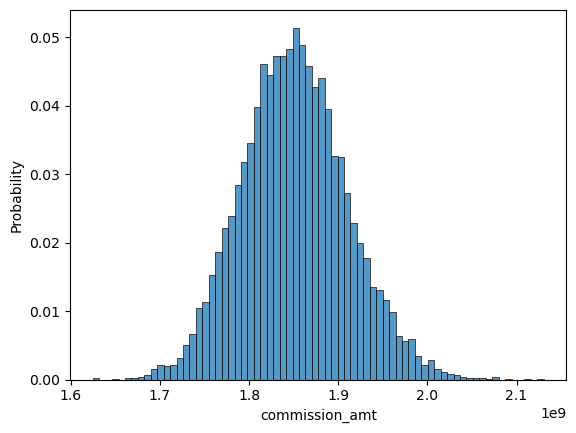

In [13]:
sns.histplot(data=result, x='commission_amt',stat='probability' )

## Kết luận:
- Sau khi mô phỏng 10.000 lần ta thấy rằng tổng số tiền hoa hồng cần chi trả có xác suất xảy ra cao nhất ở vùng giá trị 1.8-1.9 tỷ đồng.
- Giá trị nhỏ nhất là 1.6 tỷ và nhiều nhất khoảng >2.1 tỷ.
- Giả sử budget cho commission là 2 tỷ đồng, thì xác suất over budget của là 0.05%.

In [16]:
from scipy.stats import norm

1 - norm.cdf(x=2000000000, loc=result.commission_amt.mean(), scale=result.commission_amt.std())

0.005936608995524617